In [1]:
# imports




from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Ensure required metrics are imported
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#(1)Predict closed businesses using a decision tree. You may start with any features and max_depth you like. Report the accuracy, precision, recall, and F1 score.

fl_bus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv")
fl_bus.head()

<ipython-input-3-1c278c8aee26>:3: DtypeWarning: Columns (12,45,46,47,48,49,50,51,52,83) have mixed types. Specify dtype option on import or set low_memory=False.
  fl_bus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv")


business_id                                         categories  \
0  oaepsyvc0J17qwi8cfrOWg                         Beauty & Spas, Hair Salons   
1  SFqFFIA4Ks2oHfgEANoRlw  Tapas Bars, Restaurants, American (New), Food,...   
2  2PxZ-fICnd432NJHefXrcA                          Hotels & Travel, Airports   
3  SrsebLQ5lVehQXJp8OcBUg  Asian Fusion, American (New), Restaurants, Sus...   
4  MUeUyqhMja-nnmvgP4rBBg  Hotels, Vacation Rentals, Hotels & Travel, Eve...   

          city                                            address  is_open  \
0  Orange City                                 2566 Enterprise Rd        1   
1      Orlando                              8625 International Dr        1   
2      Orlando                                  1 Jeff Fuqua Blvd        1   
3      Orlando  Universal Citywalk - Orlando, 6000 Universal Blvd        1   
4    Kissimmee                            4787 W Irlo Bronson Hwy        0   

    latitude  longitude                                 name  postal_code  \
0  28.914482 -81.295979                          Great Clips      32763.0   
1  28.440381 -81.469822                     Café Tu Tu Tango      32819.0   
2  28.427839 -81.308183  Orlando International Airport - MCO      32827.0   
3  28.473028 -81.465348         The Cowfish Sushi Burger Bar      32819.0   
4  28.330255 -81.469464               Saratoga Resort Villas      34746.0   

   review_count  ...  hours_Saturday hours_Sunday hours_Thursday  \
0             8  ...             NaN          NaN            NaN   
1          3236  ...        10:0-0:0    10:0-22:0      12:0-23:0   
2          2630  ...         0:0-0:0      0:0-0:0        0:0-0:0   
3          2407  ...        11:0-0:0    11:0-22:0      16:0-22:0   
4            55  ...         0:0-0:0      0:0-0:0        0:0-0:0   

  hours_Tuesday hours_Wednesday state AcceptCreditCards  \
0           NaN             NaN    FL                 1   
1     12:0-23:0       12:0-23:0    FL                 1   
2       0:0-0:0         0:0-0:0    FL                 1   
3     16:0-22:0       16:0-22:0    FL                 1   
4       0:0-0:0         0:0-0:0    FL                 1   

  attributes_RestaurantsDelivery_None  \
0                                True   
1                               False   
2                                True   
3                                True   
4                                True   

  attributes_RestaurantsDelivery_True_True NoiseLevel  
0                                    False        2.0  
1                                     True        NaN  
2                                    False        2.0  
3                                    False        NaN  
4                                    False        2.0  

[5 rows x 106 columns]

In [ ]:
# Preprocessing (Assuming 'is_closed' is the target variable)
X = fl_bus.drop(columns=['is_open'])
y = fl_bus['is_open']

In [ ]:
# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)
# Handle missing values

X.fillna(0, inplace=True)

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [ ]:
# ----------------------
# (1) Initial Decision Tree Model
# ----------------------
# Initialize and train Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
# Predictions
y_pred = dtree.predict(X_test)

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7891
Precision: 0.7962
Recall: 0.9631
F1 Score: 0.8717


In [ ]:
# ----------------------
# (2) Varying max_depth & AUC Visualization
# ----------------------
max_depths = range(1, 5)
auc_scores = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

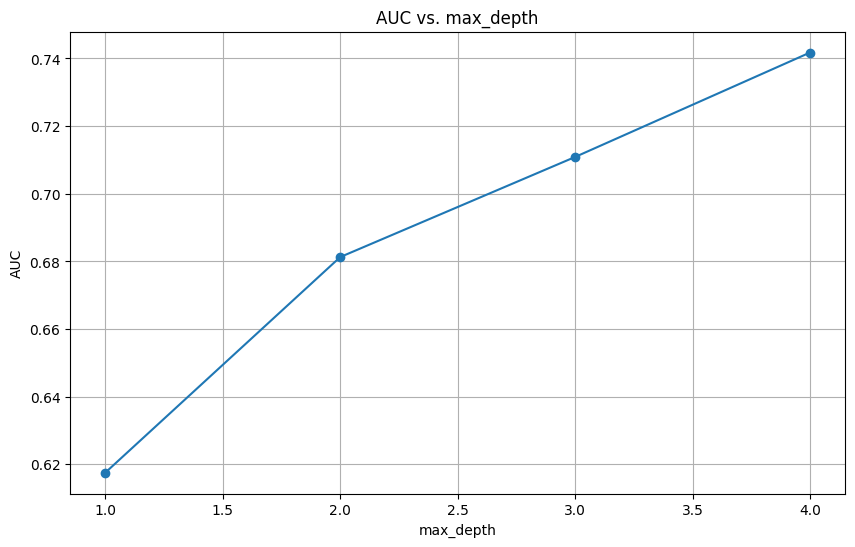

In [ ]:
# Plot AUC vs. max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, auc_scores, marker='o')
plt.title('AUC vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


In [ ]:
# ----------------------
# (3) Best max_depth Analysis
# ----------------------
best_depth = max_depths[np.argmax(auc_scores)]
best_auc = max(auc_scores)

print(f"Best max_depth: {best_depth}")
print(f"Best AUC: {best_auc:.4f}")

Best max_depth: 4
Best AUC: 0.7417


In [ ]:
# The best max_depth was chosen based on the highest AUC value from the plot.
# This ensures the model balances complexity and generalization effectively.